# [비동기 처리](https://joshua1988.github.io/web-development/javascript/javascript-asynchronous-operation/)
자바스크립트의 비동기 처리란 특정 코드의 연산이 끝날 때까지 코드의 실행을 멈추지 않고 다음 코드를 먼저 실행하는 자바스크립트의 특성을 의미합니다.

```javascript
// #1
console.log('Hello');
// #2
setTimeout(function() {
	console.log('Bye');
}, 3000);
// #3
console.log('Hello Again');
```
비동기 처리에 대한 이해가 없는 상태에서 위 코드를 보면 아마 다음과 같은 결과값이 나올 거라고 생각할 겁니다.
- ‘Hello’ 출력
- 3초 있다가 ‘Bye’ 출력
- ‘Hello Again’ 출력

그런데 실제 결과 값은 아래와 같이 나오죠.
- ‘Hello’ 출력
- ‘Hello Again’ 출력
- 3초 있다가 ‘Bye’ 출력

setTimeout()는 비동기 방식으로 실행되기 때문에 3초를 기다렸다가 다음 코드를 수행하는 것이 아니라 일단 setTimeout()을 실행하고 나서 바로 다음 코드인 console.log('Hello Again');으로 넘어갔습니다. 따라서, ‘Hello’, ‘Hello Again’를 먼저 출력하고 3초가 지나면 ‘Bye’가 출력됩니다.

# [프로미스](https://joshua1988.github.io/web-development/javascript/promise-for-beginners/)
- 프로미스는 자바스크립트 비동기 처리에 사용되는 객체입니다. 
- 여기서 자바스크립트의 비동기 처리란 ‘특정 코드의 실행이 완료될 때까지 기다리지 않고 다음 코드를 먼저 수행하는 자바스크립트의 특성’을 의미합니다

## [프로미스 상태](https://ko.javascript.info/promise-basics)
프로미스를 사용할 때 알아야 하는 가장 기본적인 개념이 바로 프로미스의 상태(states)입니다. 여기서 말하는 상태란 프로미스의 처리 과정을 의미합니다. new Promise()로 프로미스를 생성하고 종료될 때까지 3가지 상태를 갖습니다.

- Pending(대기) : 비동기 처리 로직이 아직 완료되지 않은 상태
- Fulfilled(이행) : 비동기 처리가 완료되어 프로미스가 결과 값을 반환해준 상태
- Rejected(실패) : 비동기 처리가 실패하거나 오류가 발생한 상태

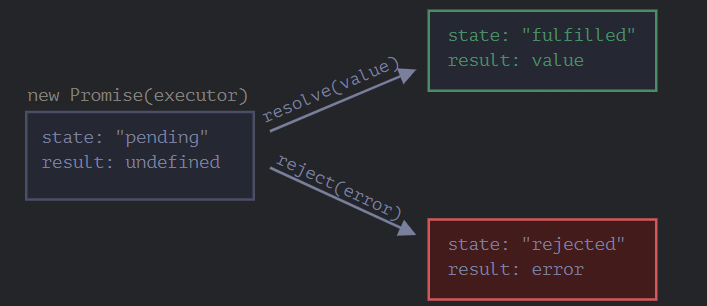

### Pending

```javascript
new Promise(function(resolve, reject) {
  // 작업진행 
});
```

### Fulfilled

```javascript
let promise = new Promise(function(resolve, reject) {
  // 프라미스가 만들어지면 executor 함수는 자동으로 실행됩니다.

  // 1초 뒤에 일이 성공적으로 끝났다는 신호가 전달되면서 result는 '완료'가 됩니다.
  setTimeout(() => resolve("완료"), 1000);
});
```

### Rejected

```javascript
let promise = new Promise(function(resolve, reject) {
  // 1초 뒤에 에러와 함께 실행이 종료되었다는 신호를 보냅니다.
  setTimeout(() => reject(new Error("에러 발생!")), 1000);
});
```

## then
- .then의 첫 번째 인수는 프라미스가 이행되었을 때 실행되는 함수이고, 여기서 실행 결과를 받습니다.
- .then의 두 번째 인수는 프라미스가 거부되었을 때 실행되는 함수이고, 여기서 에러를 받습니다.

```javascript
let promise = new Promise(function(resolve, reject) {
  setTimeout(() => resolve("완료!"), 1000);
});

// resolve 함수는 .then의 첫 번째 함수(인수)를 실행합니다.
promise.then(
  result => alert(result), // 1초 후 "완료!"를 출력
  error => alert(error) // 실행되지 않음
);
```

## catch

```javascript
let promise = new Promise((resolve, reject) => {
  setTimeout(() => reject(new Error("에러 발생!")), 1000);
});

// .catch(f)는 promise.then(null, f)과 동일하게 작동합니다
promise.catch(alert); // 1초 뒤 "Error: 에러 발생!" 출력
```

```javascript
function getData() {
  return new Promise(function(resolve, reject) {
    reject('failed');
  });
}

getData().then().catch(function(err) {
  console.log(err);
});
```

## [프로미스 체이닝](https://ko.javascript.info/promise-chaining)

```javascript
new Promise(function(resolve, reject) {

  setTimeout(() => resolve(1), 1000); // (*)

}).then(function(result) { // (**)

  alert(result); // 1
  return result * 2;

}).then(function(result) { // (***)

  alert(result); // 2
  return result * 2;

}).then(function(result) {

  alert(result); // 4
  return result * 2;

});
```

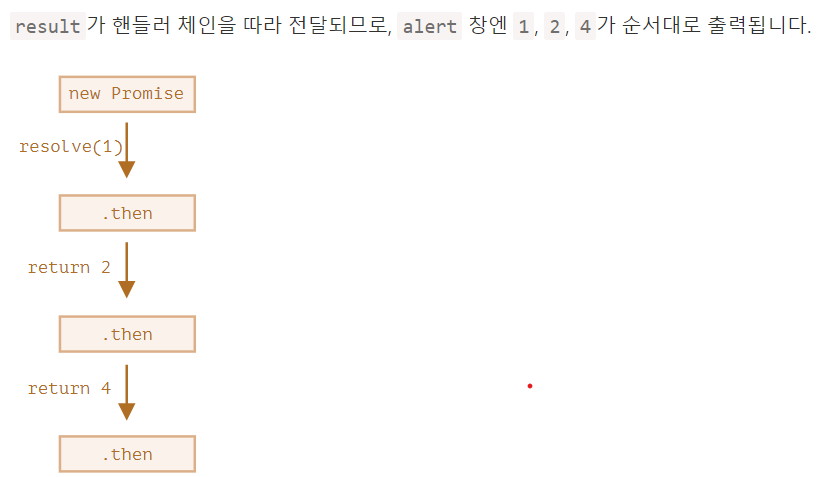

```javascript
let promise = new Promise(function(resolve, reject) {
  setTimeout(() => resolve(1), 1000);
});

promise.then(function(result) {
  alert(result); // 1
  return result * 2;
});

promise.then(function(result) {
  alert(result); // 1
  return result * 2;
});

promise.then(function(result) {
  alert(result); // 1
  return result * 2;
});
```

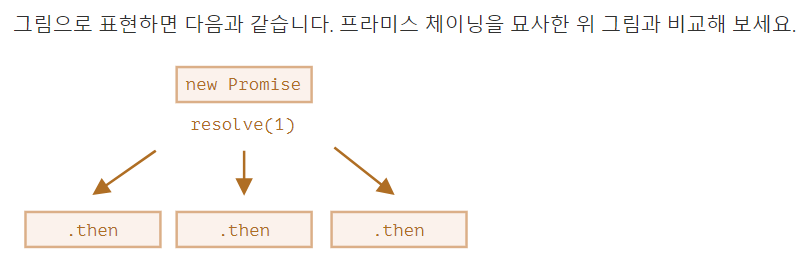

# [async & await](https://ko.javascript.info/async-await)
async와 await라는 특별한 문법을 사용하면 프라미스를 좀 더 편하게 사용할 수 있습니다. async, await는 놀라울 정도로 이해하기 쉽고 사용법도 어렵지 않습니다.

## async
function 앞에 async를 붙이면 해당 함수는 항상 프라미스를 반환합니다. 프라미스가 아닌 값을 반환하더라도 이행 상태의 프라미스(resolved promise)로 값을 감싸 이행된 프라미스가 반환되도록 합니다.

```javascript
async function f() {
  return 1;
}

f().then(alert); // 1
```

명시적으로 프라미스를 반환하는 것도 가능한데, 결과는 동일합니다.

```javascript
async function f() {
  return Promise.resolve(1);
}

f().then(alert); // 1
```


## await
자바스크립트는 await 키워드를 만나면 프라미스가 처리될 때까지 기다립니다(await는 '기다리다’라는 뜻을 가진 영단어입니다 – 옮긴이). 결과는 그 이후 반환됩니다.

1초 후 이행되는 프라미스를 예시로 사용하여 await가 어떻게 동작하는지 살펴봅시다.

```javascript
async function f() {

  let promise = new Promise((resolve, reject) => {
    setTimeout(() => resolve("완료!"), 1000)
  });

  let result = await promise; // 프라미스가 이행될 때까지 기다림 (*)

  alert(result); // "완료!"
}

f();
```

async 함수가 아닌데 await을 사용하면 문법 에러가 발생합니다.

```javascript
function f() {
  let promise = Promise.resolve(1);
  let result = await promise; // Syntax error
}
```